<a href="https://colab.research.google.com/github/daljeetkaursaini/Daljeetkaursaini/blob/main/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 9s - loss: 0.2506 - accuracy: 0.9248 - val_loss: 0.1093 - val_accuracy: 0.9647 - 9s/epoch - 18ms/step
Epoch 2/20
469/469 - 7s - loss: 0.1029 - accuracy: 0.9690 - val_loss: 0.0769 - val_accuracy: 0.9750 - 7s/epoch - 16ms/step
Epoch 3/20
469/469 - 7s - loss: 0.0726 - accuracy: 0.9765 - val_loss: 0.0698 - val_accuracy: 0.9783 - 7s/epoch - 15ms/step
Epoch 4/20
469/469 - 7s - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0637 - val_accuracy: 0.9803 - 7s/epoch - 15ms/step
Epoch 5/20
469/469 - 7s - loss: 0.0460 - accuracy: 0.9847 - val_loss: 0.0713 - val_accuracy: 0.9778 - 7s/epoch - 15ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0661 - val_accuracy: 0.9816 - 7s/epoch - 15ms/step
Epoch 7/20
469/469 - 7s - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0718 - val_accuracy: 0.9802 - 7s/epoch - 15ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0715 - val_accuracy: 0.9799 - 7s/epoch - 15ms/step
Epoch 9/20
469/4

In [ ]:
history.history

{'accuracy': [0.9247833490371704,
  0.9690166711807251,
  0.9765333533287048,
  0.9820166826248169,
  0.9847333431243896,
  0.987766683101654,
  0.9890666604042053,
  0.9894499778747559,
  0.9914666414260864,
  0.9914666414260864,
  0.9923499822616577,
  0.9935500025749207,
  0.9934666752815247,
  0.9941666722297668,
  0.9928666949272156,
  0.9935666918754578,
  0.9946833252906799,
  0.9940333366394043,
  0.9950666427612305,
  0.9940666556358337],
 'loss': [0.2506289482116699,
  0.10294214636087418,
  0.07257046550512314,
  0.055526211857795715,
  0.04595503583550453,
  0.03820433467626572,
  0.03317897021770477,
  0.03299279138445854,
  0.025845902040600777,
  0.024388005957007408,
  0.024260060861706734,
  0.019644640386104584,
  0.02046453021466732,
  0.017119936645030975,
  0.02152928151190281,
  0.01913275755941868,
  0.015567011199891567,
  0.01828344725072384,
  0.014962278306484222,
  0.01778341270983219],
 'val_accuracy': [0.9646999835968018,
  0.9750000238418579,
  0.97829997

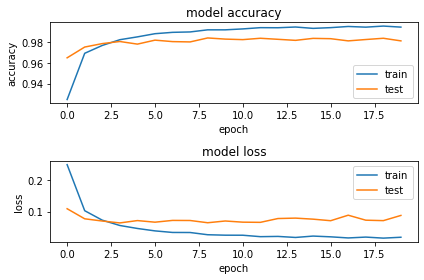

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
